In [41]:
import random
import matplotlib.pyplot as plt

In [ ]:
class GameAgent:
    def __init__(self, secret_number, max_attempts=5):
        self.secret_number = secret_number
        self.max_attempts = max_attempts
        self.attempts = 0
        self.score = 100  # Pontuação inicial
        self.state = "Esperando tentativa"
        self.history = []  # Histórico das jogadas
        self.previous_games = []  # Histórico de jogos passados

    def make_guess(self, guess):
        self.attempts += 1
        difference = abs(guess - self.secret_number)
        direction = "⬆️ Maior" if guess < self.secret_number else "⬇️ Menor"
        self.history.append((guess, difference, direction))

        if guess == self.secret_number:
            self.state = "Acertou!"
            return f"🎉 Parabéns! Você acertou o número com {self.score} pontos."

        self.score = max(0, self.score - 20)  # Penalidade por erro, garantindo que não fique negativa

        # Bônus por proximidade
        if difference <= 3:
            self.score += 10
            hint = "🔥 Você está muito perto!"
        elif difference <= 10:
            hint = "⭐ Você está relativamente perto!"
        else:
            hint = "❄️ Você ainda está longe."

        if self.attempts >= self.max_attempts:
            self.state = "Fim do jogo"
            return f"❌ Game Over! O número era {self.secret_number}. Você fez {self.score} pontos."

        if guess < self.secret_number:
            self.state = "Tentativa errada (muito baixo)"
            return f"🔼 O número é maior. {hint}"
        else:
            self.state = "Tentativa errada (muito alto)"
            return f"🔽 O número é menor. {hint}"

    def show_results(self):
        if not self.history:
            print("Nenhuma tentativa registrada.")
            return

        print("\n📊 Resumo do jogo:")
        print("-" * 50)
        print("| Tentativa | Número escolhido | Erro | Direção    |")
        print("-" * 50)
        for i, (guess, diff, direction) in enumerate(self.history):
            print(f"|    {i+1:^6}  |       {guess:^12} |  {diff:^4} | {direction:^10} |")
        print("-" * 50)
        print(f"🏆 Pontuação final: {self.score}")
        print(f"🎯 Número secreto: {self.secret_number}")

        # Salvando no histórico de jogos
        self.previous_games.append((self.secret_number, self.score, self.history))

        # Criando gráfico
        self.plot_attempts()

    def plot_attempts(self):
        plt.figure(figsize=(8,5))
        plt.plot(range(1, len(self.history) + 1), [x[0] for x in self.history], marker='o', linestyle='-')
        plt.axhline(y=self.secret_number, color='r', linestyle='--', label='Número Secreto')
        plt.xlabel("Tentativas")
        plt.ylabel("Valor do Palpite")
        plt.title("Evolução das Tentativas do Jogador")
        plt.legend()
        plt.show()

    def show_game_history(self):
        print("\n📜 Histórico de Jogos:")
        for i, (secret, score, history) in enumerate(self.previous_games, 1):
            print(f"Jogo {i}: Número secreto {secret}, Pontuação {score}, Tentativas {len(history)}")


Escolha a dificuldade (Fácil, Médio, Difícil): fácil
Digite um número: 10
🔼 O número é maior. ❄️ Você ainda está longe.
Digite um número: 50
🔽 O número é menor. ❄️ Você ainda está longe.
Digite um número: 62
🔽 O número é menor. ❄️ Você ainda está longe.
Digite um número: 89
🔽 O número é menor. ❄️ Você ainda está longe.
Digite um número: 100
❌ Game Over! O número era 29. Você fez 0 pontos.

📊 Resumo do jogo:
--------------------------------------------------
| Tentativa | Número escolhido | Erro | Direção    |
--------------------------------------------------
|      1     |            10      |   19  |  ⬆️ Maior  |
|      2     |            50      |   21  |  ⬇️ Menor  |
|      3     |            62      |   33  |  ⬇️ Menor  |
|      4     |            89      |   60  |  ⬇️ Menor  |
|      5     |           100      |   71  |  ⬇️ Menor  |
--------------------------------------------------
🏆 Pontuação final: 0
🎯 Número secreto: 29


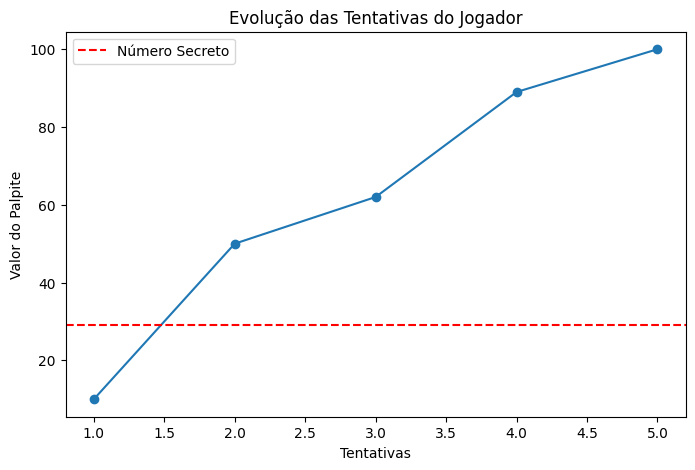


📜 Histórico de Jogos:
Jogo 1: Número secreto 29, Pontuação 0, Tentativas 5


In [45]:
# Escolha de nível de dificuldade
difficulty = input("Escolha a dificuldade (Fácil, Médio, Difícil): ").strip().lower()
if difficulty == "fácil":
    max_attempts = 10
elif difficulty == "médio":
    max_attempts = 7
else:
    max_attempts = 5

# Criando um agente com um número secreto entre 1 e 100
agent = GameAgent(secret_number=random.randint(1, 100))

while agent.state not in ["Acertou!", "Fim do jogo"]:
    try:
        guess = int(input("Digite um número: "))
        print(agent.make_guess(guess))
    except ValueError:
        print("Por favor, insira um número válido.")

# Exibir resultados finais
agent.show_results()

# Mostrar histórico de jogos
agent.show_game_history()
